1. [Load modules and data](#Modules-and-data)
1. [Table of parameter values for each simulation](#Table-of-parameter-values)
1. [Correlation matrix](#Correlation-matrix)
1. [Fisher](#Fisher)
1. [Ellipse plots](#Ellipse-plots)
1. [Error analysis](#Error-analysis)

In [11]:
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style(ticks=True, grid=False)

# Load modules and data

In [1]:
#Author: Shadab Alam : salam@roe.ac.uk
#Create a file to list all the parameters of cosmology in Abacus simulation
from __future__ import print_function

#####importing the necessary libraries
#To make the plots inline 
#otherwise it will make seperate figure
%matplotlib inline 
#for high resolution plot outputs
%config InlineBackend.figure_format = 'retina'

import numpy as np

import os
import sys

#latex display
from IPython.display import Latex


####plottinng library and setting
import pylab as pl
import matplotlib
from chainconsumer import ChainConsumer
import itertools
import pandas as pd

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

In [2]:
def GetAbacus_param(simnum=0,rootdir='',boxsize=720,redshift='z0.100'):
    '''Reads the parameters for sim num from a file list'''
    parlist_file=rootdir+'AbacusCosmos_%dbox_cosmo.parlist'%(boxsize)
    
    #dictionary to hold parameters and returns
    pardic={}
    
    #read param lists
    lines=open(parlist_file).readlines()
    for tt,tline in enumerate(lines):
        if('#params' in tline):
            plist_str=tline[:-1].split(':')[-1]
            tspl_plist=plist_str.split(',')
            break
    
    if(simnum=='planck'):
        simname=simnum
        for tt,tline in enumerate(lines):
            if('#planck' in tline):
                tspl=tline.split()
                for ii, par in enumerate(tspl_plist):
                    if(ii==0):
                        pardic[par]=simnum
                    else:
                        pardic[par]=np.float(tspl[ii])
    else:
        simname=str(simnum).zfill(2)
        #load the values of parameters
        data=np.loadtxt(parlist_file)
        #select the appropriate sim
        ind_sel=np.where(data[:,0]==simnum)[0][0]
        #populate the dictionary for selected sim num

        for ii, par in enumerate(tspl_plist):
            pardic[par]=data[ind_sel,ii]

            
    omega_b = pardic['ombh2']*10000.0/pow(pardic['H0'],2)
    pardic['omb'] = omega_b
    #halo_dir=halo_file(rootdir=rootdir,simname=simname,boxsize=boxsize,redshift=redshift)
    #pardic['halo_dir']=halo_dir
    
    clustering_file=rootdir+simname+'-wpxis024xi2dsmall-logr.txt'
    pardic['clustering_file']=clustering_file
    pardic['simname']=simname
    
    #VVF file
    #vvf_file=vvfrootdir+simname+'-vvf.txt'
    vvf_file=vvfrootdir+simname+'-vvf-RF-1000.txt'
    pardic['vvf_file']=vvf_file
    
    return pardic

rootdir='WPXIS024XI2DSMALL/AbacusCosmos_720box/'
vvfrootdir='VVF/AbacusCosmos_720box_rockstar_halos_z0.100_Mr21.gcat.rsd_zz.1pz0.100by100/'
GetAbacus_param(simnum='planck',rootdir=rootdir,boxsize=720,redshift='z0.100')

{'simNUM': 'planck',
 'H0': 67.26,
 'N_eff': 3.04,
 'Omega_M': 0.31415319,
 'ZD_Seed': 7272.0,
 'ns': 0.9652,
 'ombh2': 0.02222,
 'omch2': 0.1199,
 'omnuh2': 0.0,
 'sigma_8': 0.83,
 'w0': -1.0,
 'omb': 0.04911682988397021,
 'clustering_file': 'WPXIS024XI2DSMALL/AbacusCosmos_720box/planck-wpxis024xi2dsmall-logr.txt',
 'simname': 'planck',
 'vvf_file': 'VVF/AbacusCosmos_720box_rockstar_halos_z0.100_Mr21.gcat.rsd_zz.1pz0.100by100/planck-vvf-RF-1000.txt'}

In [3]:
def load_clustering(simnum,rootdir=''): 
    '''loads the clustering measurements'''
    
    #first load the basic parameters
    res_dic=GetAbacus_param(simnum=simnum,rootdir=rootdir,boxsize=720,redshift='z0.100')
    
    res_dic['xidata']=np.loadtxt(res_dic['clustering_file'])
    
    #loading the details of data vector header
    tmpline=open(res_dic['clustering_file'],'r').readlines()
    ngot=0
    for ii, tline in enumerate(tmpline):
        if('#njn=' in tline):
            res_dic['njn']=np.int(tline.split()[1]);
        elif('#nwp=' in tline):
            res_dic['nwp']=np.int(tline.split()[-1])
            ngot=ngot+1
        elif('#nsxi=' in tline):
            res_dic['nsxi']=np.int(tline.split()[-1])
            ngot=ngot+1
        elif('#nssmall=' in tline):
            res_dic['nssmall']=np.int(tline.split()[-1])
            ngot=ngot+1
        elif('#order=' in tline):
            res_dic['stats_order']=tline.split()[1:];

        
        #if(ngot>=2 and smallscale_split==0):
        #    break
        if(ngot>=5):
            break
            
    res_dic['beg_index']=0
    
    return res_dic

def load_vvf(simnum,rootdir=''): 
    '''loads the vvf measurements'''
    
    #first load the basic parameters
    res_dic = res_sims[simnum]
    
    res_dic['vvf']=np.loadtxt(res_dic['vvf_file'])
    #print(res_dic['vvf_file'])
    
    #loading the details of data vector header
    tmpline=open(res_dic['vvf_file'],'r').readlines()
    ngot=0
    for ii, tline in enumerate(tmpline):
        if('# stats order in row:' in tline):
            tstat=tline.split(':')[1][:-1]
            tspl=tstat.split(',')
            for tt,tmp in enumerate(tspl):
                tspl[tt]=tmp.strip()
            res_dic['stats_order']=tspl
            

        
        #if(ngot>=2 and smallscale_split==0):
        #    break
        if(ngot>=5):
            break
            
    res_dic['beg_index']=0
    res_dic['simNUM']=simnum
    
    return res_dic

simnum_list=['planck',0,1,2,3,4,5,6,7,8,9,10,
            11,12,13,14,15,16,17,18,19,
            20,21,22,23,24,25,26,27,28,30,
            30,31,32,33,34,35,36,37,38,39]
res_sims={}
for ss,simnum in enumerate(simnum_list):
#     print(simnum)
    res_sims[simnum]=load_clustering(simnum,rootdir=rootdir)
    res_sims[simnum]=load_vvf(simnum,rootdir=rootdir)

# Table of parameter values

In [4]:
#Make a table of parameter value and simnums
correct_simnum_list = ['planck',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,
                       20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,38,39] 
pulm_table = []
for simnum in correct_simnum_list:
    res_dic = GetAbacus_param(simnum=simnum,rootdir=rootdir,boxsize=720,redshift='z0.100')
    pulm_table.append((res_dic['H0'], res_dic['ns'], res_dic['ombh2'], res_dic['omch2'],
                       res_dic['sigma_8'], res_dic['w0'], res_dic['Omega_M'], res_dic['omb']))

table_cols = ['H0', 'ns', 'ombh2', 'omch2', 'sigma_8', 'w0', 'Omega_M', 'omb']
full_table = pd.DataFrame(pulm_table, columns = table_cols, index= correct_simnum_list)

In [5]:
full_table

H0        ns     ombh2     omch2   sigma_8        w0   Omega_M  \
planck  67.26000  0.965200  0.022220  0.119900  0.830000 -1.000000  0.314153   
0       68.95004  0.930033  0.020961  0.122463  0.853824 -1.139198  0.301685   
1       62.99374  0.982304  0.021699  0.109639  0.719284 -0.764783  0.330976   
2       72.28562  0.970472  0.022304  0.113994  0.851027 -1.083356  0.260847   
3       66.21955  0.975418  0.022263  0.122157  0.858119 -0.982489  0.329348   
4       74.20830  0.954402  0.022841  0.124010  0.888737 -1.221581  0.266669   
5       71.52358  0.954106  0.021831  0.128427  0.912931 -1.289901  0.293722   
6       68.60432  0.960314  0.021667  0.111466  0.768274 -0.969291  0.282868   
7       66.66885  0.987369  0.023230  0.106322  0.733582 -0.787883  0.291472   
8       65.84599  0.957165  0.022300  0.110099  0.691564 -0.795959  0.305371   
9       72.66959  0.931160  0.022178  0.126335  0.890242 -1.235559  0.281229   
10      67.03401  0.960994  0.021974  0.123182  0.830428 -0.995435  0.323031   
11      72.15313  0.962835  0.021386  0.118354  0.850806 -1.160549  0.268416   
12      65.19518  0.989783  0.022284  0.110936  0.777796 -0.827385  0.313428   
13      64.07216  0.976326  0.022200  0.113102  0.775957 -0.792247  0.329584   
14      74.79261  0.971073  0.022039  0.128241  0.998687 -1.370350  0.268649   
15      67.36219  0.976470  0.022490  0.110071  0.731931 -0.890192  0.292135   
16      70.90721  0.969375  0.022513  0.114721  0.834867 -0.998688  0.272950   
17      62.08498  0.950037  0.021791  0.110042  0.714087 -0.744883  0.342020   
18      67.87471  0.970031  0.023271  0.118017  0.830762 -0.934056  0.306685   
19      71.03927  0.954875  0.022867  0.119765  0.848908 -1.035211  0.282631   
20      64.50172  0.966897  0.023117  0.112046  0.739546 -0.742412  0.324874   
21      68.27622  0.975433  0.023157  0.121808  0.847251 -1.024898  0.310974   
22      73.27132  0.936929  0.021329  0.127243  0.923211 -1.299795  0.276739   
23      62.74818  0.964982  0.022202  0.117528  0.769882 -0.796463  0.354885   
24      73.85640  0.966207  0.022808  0.124034  0.937862 -1.243714  0.269199   
25      61.56746  0.965372  0.022809  0.116245  0.727525 -0.754321  0.366843   
26      69.32830  0.962947  0.021769  0.120078  0.830551 -1.062407  0.295120   
27      62.47385  0.959235  0.023104  0.108539  0.686586 -0.654832  0.337288   
28      65.48457  0.936735  0.021960  0.116922  0.794767 -0.940608  0.323868   
30      64.61942  0.956390  0.022026  0.113940  0.735058 -0.870352  0.325614   
31      69.79006  0.976934  0.022158  0.122787  0.890489 -1.138622  0.297590   
32      63.33729  0.983535  0.023381  0.104478  0.646633 -0.661219  0.318722   
33      66.11561  0.982377  0.022670  0.114769  0.743564 -0.865620  0.314414   
34      70.12405  0.941344  0.021687  0.129758  0.905562 -1.222170  0.307978   
35      73.23189  0.962267  0.021342  0.132191  0.978598 -1.349742  0.286287   
36      63.77189  0.962861  0.023494  0.115146  0.737968 -0.761961  0.340901   
37      70.54661  0.973076  0.022565  0.113090  0.825002 -1.042555  0.272574   
38      74.51871  0.950712  0.022025  0.118440  0.885869 -1.196158  0.252950   
39      71.86920  0.953249  0.021902  0.119750  0.881437 -1.160824  0.274244   

             omb  
planck  0.049117  
0       0.044090  
1       0.054682  
2       0.042686  
3       0.050770  
4       0.041478  
5       0.042674  
6       0.046036  
7       0.052264  
8       0.051434  
9       0.041997  
10      0.048901  
11      0.041078  
12      0.052428  
13      0.054078  
14      0.039399  
15      0.049562  
16      0.044778  
17      0.056533  
18      0.050513  
19      0.045313  
20      0.055563  
21      0.049675  
22      0.039728  
23      0.056389  
24      0.041812  
25      0.060174  
26      0.045292  
27      0.059196  
28      0.051210  
30      0.052748  
31      0.045493  
32      0.058283  
33      0.051861  
34      0.044102  
35      0.039796  
36      0.057769  
37      0.0

# Correlation matrix

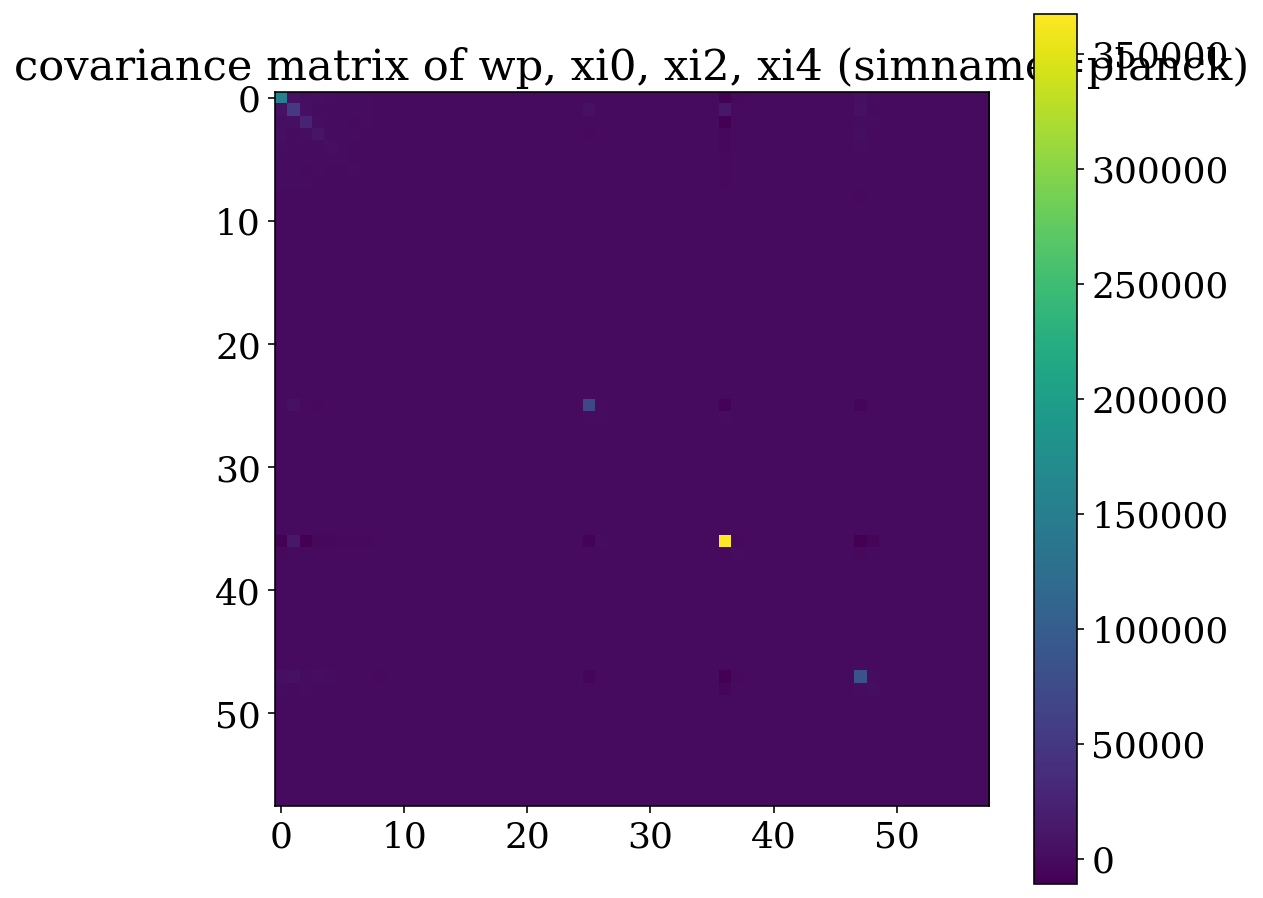

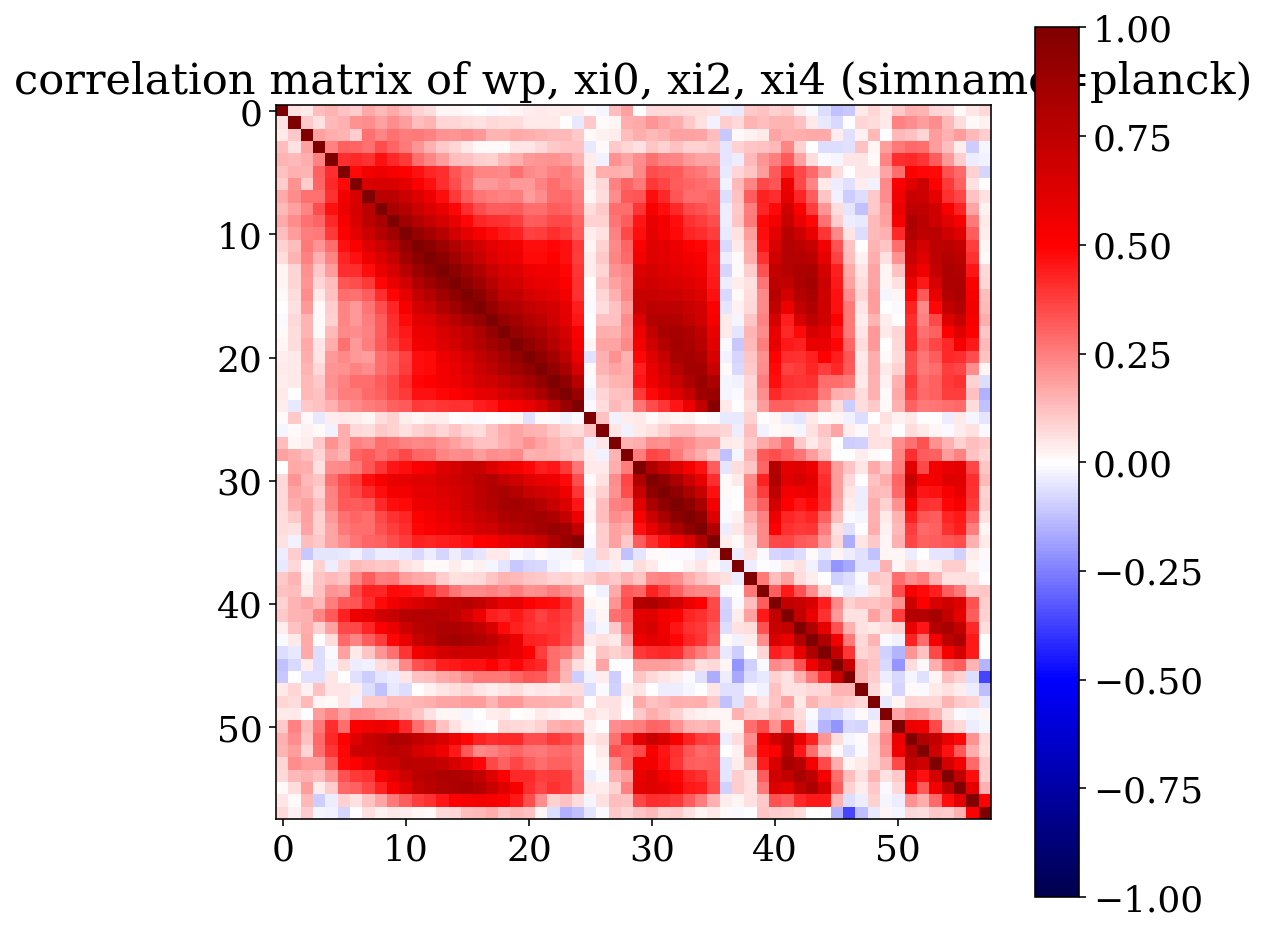

In [4]:
#15/04/2020
#Last updated: 22/07/2020
def calculate_cross_cov_corr(sim_dic, statlist, r=None, plotcov=False, saveplot=False, 
                                analysis_dir=None, bi_ei=None, hide_corr=False):
    '''
    Plot and save cross-covariance and cross-correlation matrices
    Input:
    --------
    sim_dic: A dictionary with simulation parameters and xidata
    statlist: list of statistics between whome cross-correlation matrix is to be constructed
    r: Minimum scale in Mpc/h above which the correlation matrix is to be calculated
    plotcov: Whether to plot covariance matrix
    saveplot: Whether to save the plots (plots will not be displayed if True)
    analysis_dir: Directory to save the plots
    bi_ei: Dictonary of form {'statname': [bi,ei]} with begin and end index for a statistic.
            Can be useful while calculating covariance matrix for different scales for different
            statistics.
    hide_corr: Do not show the correlation matrix plot (useful while looping large number of times)
    
    Return:
    --------
    Cross covariance matrix
    '''
    
    if saveplot and analysis_dir==None:
        print("Exiting the function. Please give a directory to save the plots.")
        return 4
    
    if saveplot:
        #Create necessary sub-directories
        cov_dir = analysis_dir + 'cov_matrices/'
        corr_dir = analysis_dir + 'corr_matrices/'
        if not os.path.isdir(cov_dir):
            !mkdir $cov_dir
        if not os.path.isdir(corr_dir):
            !mkdir $corr_dir
    
    #Make a dictionary of xidata segregated by statistics
    seg = {}
    if bi_ei == None:
        bi_ei = {} #begin and end index for all statistics
        
    if ('wp' in statlist) and ('wp' not in bi_ei.keys()):
        bi = sim_dic['beg_index'] 
        ei = sim_dic['beg_index'] + sim_dic['nwp']
        bi_ei['wp'] = [bi, ei]
        if r != None:
            bi_ei['wp'][0] = np.where(sim_dic['xidata'][bi_ei['wp'][0]:bi_ei['wp'][1],0] > r)[0][0]
    if 'wp' in statlist:
        seg['wp'] = sim_dic['xidata'][bi_ei['wp'][0]:bi_ei['wp'][1],4:]
        
    for ii, pole in enumerate([0,2,4]):
        if ('xi'+str(pole) in statlist) and ('xi'+str(pole) not in bi_ei.keys()):
            ind1 = sim_dic['beg_index'] + sim_dic['nwp'] + ii*(sim_dic['nssmall'] + sim_dic['nsxi'])
            ind2 = ind1 + sim_dic['nsxi'] + sim_dic['nssmall']
            bi_ei['xi'+str(pole)] = [ind1, ind2]
            if r != None:
                bi_ei['xi'+str(pole)][0] = bi_ei['xi'+str(pole)][0] + np.where(
                    sim_dic['xidata'][bi_ei['xi'+str(pole)][0]:bi_ei['xi'+str(pole)][1],0] > r)[0][0]
        if 'xi'+str(pole) in statlist:
            seg['xi'+str(pole)] = sim_dic['xidata'][bi_ei['xi'+str(pole)][0]:bi_ei['xi'+str(pole)][1],4:]
    
    if ('vvf_p' in statlist) and ('vvf_p' not in bi_ei.keys()):
        bi_ei['vvf_p'] = [1,6]
    if 'vvf_p' in statlist:
        seg['vvf_p'] = sim_dic['vvf'][bi_ei['vvf_p'][0]:bi_ei['vvf_p'][1],4:]
        
    if ('vvf_rho' in statlist) and ('vvf_rho' not in bi_ei.keys()):
        bi_ei['vvf_rho'] = [6,7]
    if 'vvf_rho' in statlist:
        seg['vvf_rho'] = sim_dic['vvf'][bi_ei['vvf_rho'][0]:bi_ei['vvf_rho'][1],4:]
        
    if ('vvf_std' in statlist) and ('vvf_std' not in bi_ei.keys()):
        bi_ei['vvf_std'] = [0,1]
    if 'vvf_std' in statlist:
        seg['vvf_std'] = sim_dic['vvf'][bi_ei['vvf_std'][0]:bi_ei['vvf_std'][1],4:]
        
    #Prepare for covariance by stacking data for given statistics
    pulm_cov = seg[statlist[0]]
    ts = statlist[0]
    for statistic in statlist[1:]:
        pulm_cov = np.row_stack([pulm_cov, seg[statistic]])
        ts = ts + ', ' + statistic
    
    #Covariance
    cova = (sim_dic['njn']-1)*np.cov(pulm_cov)
    
    if plotcov:
        pl.figure(figsize=(8,8))
        pl.imshow(cova)
        pl.colorbar()
        pl.title('covariance matrix of ' + ts + ' (simname=' + sim_dic['simname'] + ')')
        if saveplot:
            pl.savefig(cov_dir + str(sim_dic['simname']) + '.png')
            pl.close()
    
    #Correlation
    corr = np.copy(cova)
    for ii in range(0, cova.shape[0]):
        for jj in range(0, cova.shape[1]):
            corr[ii,jj] = cova[ii,jj]/(np.sqrt(cova[ii,ii])*np.sqrt(cova[jj,jj]))

    if not hide_corr:
        pl.figure(figsize=(8,8))
        pl.imshow(corr,vmin=-1,vmax=1,cmap='seismic')
        pl.colorbar()
        pl.title('correlation matrix of ' + ts + ' (simname=' + sim_dic['simname'] + ')')
    if saveplot:
        pl.savefig(corr_dir + str(sim_dic['simname']) + '.png')
        pl.close()
    return cova
        
plank = res_sims['planck']
cova=calculate_cross_cov_corr(sim_dic=plank, statlist=['wp', 'xi0', 'xi2', 'xi4'], 
                       plotcov=True, saveplot=False, hide_corr=False)

# Fisher
$$\mathcal{F} = \mathcal{S^T}*\mathcal{C^{-1}}*\mathcal{S}$$  
$$Where,\, S_{ij} = \frac{\partial wp_i}{\partial\theta_j};\; and\: \mathcal{C}\: is\: correlation\: matrix$$

In [5]:
#Last updated on 07/07/2020
def seg_stats_paramdict(res_sims, simnumlist, paramlist, statlist, r=None, bi_ei=None, silent=False):
    '''
    Generate a dictionary of parameter values for given set of simnums, and generate a dictionary of
    values of various statistics seggeregated by statistic name.
    
    Input:
    --------
    res_sims: Dictionary containing all the simulations data. (Generated by function load_clustering)
    simnumlist: List of simnums of interest
    paramlist: List of parameters of interest
    statlist: List of statistics of interest
    r: Minimum scale in Mpc/h above which the calculations are to be done
    bi_ei: Dictonary of form {'statname': [bi,ei]} with begin and end index for a statistic.
            Can be useful when different scales are considered for different statistics.
    silent: Prints scales used for various parameters when False (default). Does not print anything if True.
    
    Return:
    --------
    paramdict: Dictionary of the list of parameter values for given simnums. 
                Eg. {'H0': [67.26, 68.95004, 62.99374], 'ns': [0.9652, 0.9300325, 0.9823038]}
    statistics: dictonary of numpy arrays of shape (n*m) containing the clustering measurements and 
                the corresponding scales (r), seggeregated by the name of the statistic. 
                Where, m= number of scales and n= 1 + number of simnums. Matrix is of format 
                [[r1,r2,...,rm],
                [stat_r1_sim1,stat_r2_sim1,...,stat_rm_sim1],
                .
                .
                .
                [stat_r1_simn,stat_r2_simn,...,stat_rm_simn]]
    '''
    
    ref_sim = res_sims['planck']
    if bi_ei == None:
        bi_ei = {} #begin and end index for all statistics
    statistics = {}
    paramdict = {}
    
    #load scales
    #Generate begin and end index matrix for later if not provided already
    if ('wp' in statlist) and ('wp' not in bi_ei.keys()):
        bi = ref_sim['beg_index'] 
        ei = ref_sim['beg_index'] + ref_sim['nwp']
        bi_ei['wp'] = [bi, ei]
        if r != None:
            bi_ei['wp'][0] = np.where(ref_sim['xidata'][bi_ei['wp'][0]:bi_ei['wp'][1],0] > r)[0][0]
    if 'wp' in statlist:
        statistics['wp'] = res_sims[simnumlist[0]]['xidata'][bi_ei['wp'][0]:bi_ei['wp'][1],0]
        if not silent:
            print("Scales for wp =", res_sims[simnumlist[0]]['xidata'][bi_ei['wp'][0]:bi_ei['wp'][1],0])
    
    for ii, pole in enumerate([0,2,4]):
        if ('xi'+str(pole) in statlist) and ('xi'+str(pole) not in bi_ei.keys()):
            ind1 = ref_sim['beg_index'] + ref_sim['nwp'] + ii*(ref_sim['nssmall'] + ref_sim['nsxi'])
            ind2 = ind1 + ref_sim['nsxi'] + ref_sim['nssmall']
            bi_ei['xi'+str(pole)] = [ind1, ind2]
            if r != None:
                bi_ei['xi'+str(pole)][0] = bi_ei['xi'+str(pole)][0] + np.where(
                    ref_sim['xidata'][bi_ei['xi'+str(pole)][0]:bi_ei['xi'+str(pole)][1],0] > r)[0][0]
        if 'xi'+str(pole) in statlist:
            statistics['xi'+str(pole)] = ref_sim['xidata'][bi_ei['xi'+str(pole)][0]:bi_ei['xi'+str(pole)][1],0]
            if not silent:
                print("Scales for", 'xi'+str(pole), "=", 
                  ref_sim['xidata'][bi_ei['xi'+str(pole)][0]:bi_ei['xi'+str(pole)][1],0])
            
    if ('vvf_p' in statlist) and ('vvf_p' not in bi_ei.keys()):
        bi_ei['vvf_p'] = [1,6]
    if 'vvf_p' in statlist:
        statistics['vvf_p'] = np.ones(5)
        
    if ('vvf_rho' in statlist) and ('vvf_rho' not in bi_ei.keys()):
        bi_ei['vvf_rho'] = [6,7]
    if 'vvf_rho' in statlist:
        statistics['vvf_rho'] = np.ones(1)
        
    if ('vvf_std' in statlist) and ('vvf_std' not in bi_ei.keys()):
        bi_ei['vvf_std'] = [0,1]
    if 'vvf_std' in statlist:
        statistics['vvf_std'] = np.ones(1)
        
    #Load measurements
    for sim_num in simnumlist:
        sim_dic = res_sims[sim_num]
        for statistic in statlist:
            if statistic.split("_")[0] == 'vvf':
                statistics[statistic] = np.vstack([statistics[statistic],
                                               sim_dic['vvf'][bi_ei[statistic][0]:bi_ei[statistic][1],1]])
            else:
                statistics[statistic] = np.vstack([statistics[statistic],
                                               sim_dic['xidata'][bi_ei[statistic][0]:bi_ei[statistic][1],1]])
        for param in paramlist:
            paramdict.setdefault(param, []).append(sim_dic[param])
            
    return paramdict, statistics
       

seg_stats_paramdict(res_sims, ['planck', 0, 1], ['H0', 'ns'], ['wp','vvf_p', 'vvf_rho', 'vvf_std'], r=10)

Scales for wp = [13.64092 18.78987 25.88236]


({'H0': [67.26, 68.95004, 62.99374], 'ns': [0.9652, 0.9300325, 0.9823038]},
 {'wp': array([[13.64092   , 18.78987   , 25.88236   ],
         [13.67750416,  9.30527374,  5.88210874],
         [14.56389168, 10.05456322,  6.37557283],
         [11.96598067,  8.13767825,  5.13363856]]),
  'vvf_p': array([[1.        , 1.        , 1.        , 1.        , 1.        ],
         [0.022     , 0.10422996, 0.47790033, 1.82620041, 5.0423708 ],
         [0.024     , 0.109     , 0.48583171, 1.82210547, 5.0027779 ],
         [0.028     , 0.12      , 0.51608397, 1.82883995, 4.80151351]]),
  'vvf_rho': array([[1.        ],
         [0.00298149],
         [0.00270795],
         [0.00288318]]),
  'vvf_std': array([[1.        ],
         [1.44010568],
         [1.42712197],
         [1.35378776]])})

In [6]:
#29/06/2020
#Last updated: 22/07/2020
def generate_fisher_matrix(sim_dic, simnumlist, statlist, physical=True, paramlist=None, r=None, bi_ei=None,
                           hide_corr=True, silent=False):
    '''
    Plot correlation matrix and generate Fisher matrix for given simulation
    Input:
    --------
    sim_dic: A dictionary with simulation parameters and xidata
    simnumlist: List of simnums of interest
    statlist: List of statistics of interest
    physical: Use physical densities if True
    paramlist: List of parameters of interest
    r: Minimum scale in Mpc/h above which the calculations are to be done
    bi_ei: Dictonary of form {'statname': [bi,ei]} with begin and end index for a statistic.
            Can be useful when different scales are considered for different statistics.
    hide_corr: Do not show the correlation matrix plots.
    silent: Prints scales used for various parameters and shape of various matrix when False (default). 
            Does not print anything if True.
    
    Return:
    --------
    Fisher matrix, list of parameters and latex list of parameter that can be used as labels
    '''
    
    if physical == True:
        paramlist = ['H0', 'ns', 'ombh2', 'omch2', 'sigma_8', 'w0']
        plot_paramlist = ['$H_0$', '$ns$', '$\Omega_bh^2$', '$\Omega_{CDM}h^2$', '$\sigma_8$', '$w_0$']
    elif physical == False:
        paramlist = ['H0', 'Omega_M', 'ns', 'sigma_8', 'w0', 'omb']
        plot_paramlist = ['$H_0$', '$\Omega_M$', '$ns$', '$\sigma_8$', '$w_0$', '$\Omega_b$']
    
    #Inverse to be used in Fisher calculation
    cova_inv = np.linalg.inv(calculate_cross_cov_corr(sim_dic, statlist, r=r, bi_ei=bi_ei, hide_corr=hide_corr))
    if not silent:
        print("Shape of inverse covariance matrix =", cova_inv.shape)
    
    #Calculate derivative matrix
    paramdict, statistics = seg_stats_paramdict(res_sims, simnumlist, paramlist, statlist, 
                                                r=r, bi_ei=bi_ei, silent=silent)
    ref_paramdict, ref_statistics = seg_stats_paramdict(res_sims, ['planck'], paramlist, statlist, 
                                                        r=r, bi_ei=bi_ei, silent=silent)
    
    combined_stats = statistics[statlist[0]][1:]
    ref_combined_stats = ref_statistics[statlist[0]][1:]
    for stat in statlist[1:]:
        combined_stats = np.append(combined_stats, statistics[stat][1:], axis = 1)
        ref_combined_stats = np.append(ref_combined_stats, ref_statistics[stat][1:], axis = 1)
        
    derivative_matrix = []
    for r_scale in range(len(combined_stats[0])):
        nparam = len(paramlist)
        T_dash = combined_stats[:,r_scale] - ref_combined_stats[:,r_scale]
        theta = np.empty([nparam, nparam])
        for i, param in enumerate(paramlist):
            theta[:,i] = np.array(paramdict[param]) - np.array(ref_paramdict[param])
        derivative_matrix.append(np.linalg.solve(theta, T_dash))

    derivative_matrix = np.array(derivative_matrix)
    if not silent:
        print("Shape of derivative matrix =", derivative_matrix.shape)
    
    temp1 = np.dot(derivative_matrix.T, cova_inv)
    fisher = np.dot(temp1, derivative_matrix)
    
    if not silent:
        print("Shape of fisher matrix =", fisher.shape)
    return fisher, paramlist, plot_paramlist

# Ellipse plots

Shape of inverse covariance matrix = (26, 26)
Scales for wp = [ 2.7507   3.78899  5.2192   7.18925  9.90293 13.64092 18.78987 25.88236]
Scales for xi0 = [ 2.99916252  4.75335226  7.53355564 11.93988104 18.92343619 29.99162519]
Scales for xi2 = [ 2.99916252  4.75335226  7.53355564 11.93988104 18.92343619 29.99162519]
Scales for xi4 = [ 2.99916252  4.75335226  7.53355564 11.93988104 18.92343619 29.99162519]
Scales for wp = [ 2.7507   3.78899  5.2192   7.18925  9.90293 13.64092 18.78987 25.88236]
Scales for xi0 = [ 2.99916252  4.75335226  7.53355564 11.93988104 18.92343619 29.99162519]
Scales for xi2 = [ 2.99916252  4.75335226  7.53355564 11.93988104 18.92343619 29.99162519]
Scales for xi4 = [ 2.99916252  4.75335226  7.53355564 11.93988104 18.92343619 29.99162519]
Shape of derivative matrix = (26, 6)
Shape of fisher matrix = (6, 6)

H0 = 67.26 +- 0.71
Omega_M = 0.314 +- 0.004
ns = 0.965 +- 0.007
sigma_8 = 0.83 +- 0.007
w0 = -1.0 +- 0.047
omb = 0.049 +- 0.001


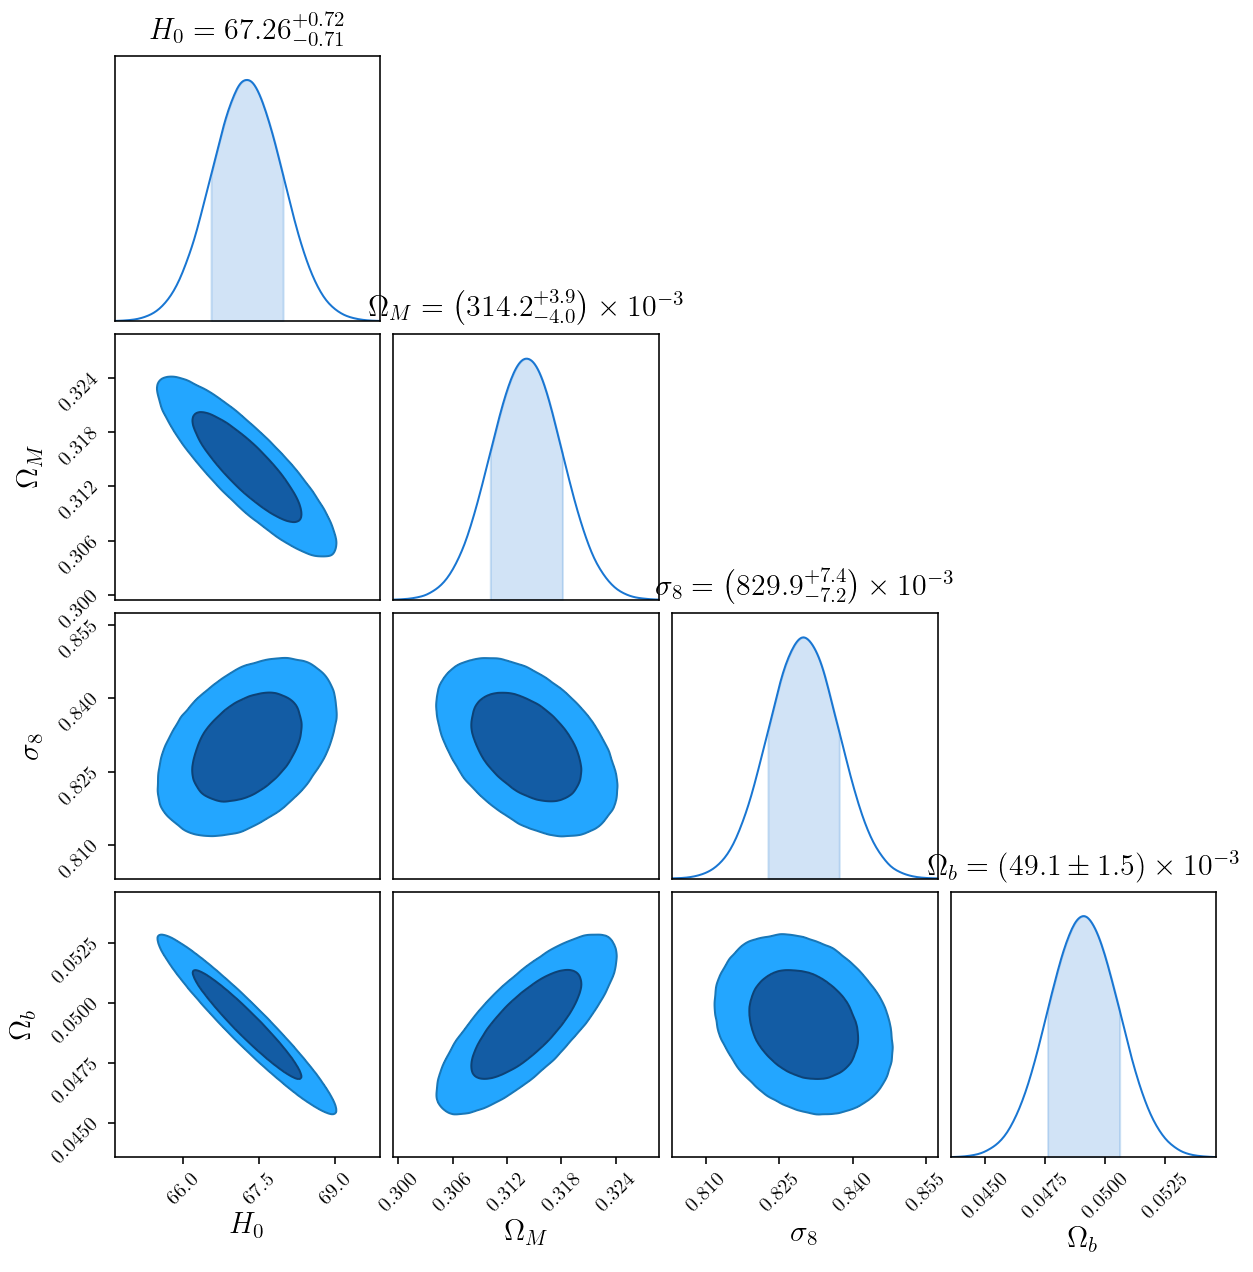

In [9]:
#Physical=True

simnumlist = [3,37,10,13,16,26]
plank = res_sims['planck']
fisher, paramlist, parameters = generate_fisher_matrix(sim_dic=plank, simnumlist=simnumlist, 
                                                       statlist=['wp','xi0', 'xi2', 'xi4'], physical=False, r=2)

print()
covmat = np.linalg.inv(fisher)

for i in range(covmat.shape[0]):
    print(paramlist[i] + " = " + str(round(plank[paramlist[i]], 3)) + ' +- ' + str(round(np.sqrt(covmat[i,i]), 3)))

c = ChainConsumer()
c.add_covariance([plank[paramlist[0]], plank[paramlist[1]], plank[paramlist[2]], plank[paramlist[3]], 
                  plank[paramlist[4]], plank[paramlist[5]]], covmat, parameters=parameters)

c.configure(label_font_size=15)
fig = c.plotter.plot(parameters=['$H_0$', '$\Omega_M$', '$\sigma_8$', '$\Omega_b$'])

fig.set_size_inches(3 + fig.get_size_inches())

Shape of inverse covariance matrix = (33, 33)
Scales for wp = [ 2.7507   3.78899  5.2192   7.18925  9.90293 13.64092 18.78987 25.88236]
Scales for xi0 = [ 2.99916252  4.75335226  7.53355564 11.93988104 18.92343619 29.99162519]
Scales for xi2 = [ 2.99916252  4.75335226  7.53355564 11.93988104 18.92343619 29.99162519]
Scales for xi4 = [ 2.99916252  4.75335226  7.53355564 11.93988104 18.92343619 29.99162519]
Scales for wp = [ 2.7507   3.78899  5.2192   7.18925  9.90293 13.64092 18.78987 25.88236]
Scales for xi0 = [ 2.99916252  4.75335226  7.53355564 11.93988104 18.92343619 29.99162519]
Scales for xi2 = [ 2.99916252  4.75335226  7.53355564 11.93988104 18.92343619 29.99162519]
Scales for xi4 = [ 2.99916252  4.75335226  7.53355564 11.93988104 18.92343619 29.99162519]
Shape of derivative matrix = (33, 6)
Shape of fisher matrix = (6, 6)


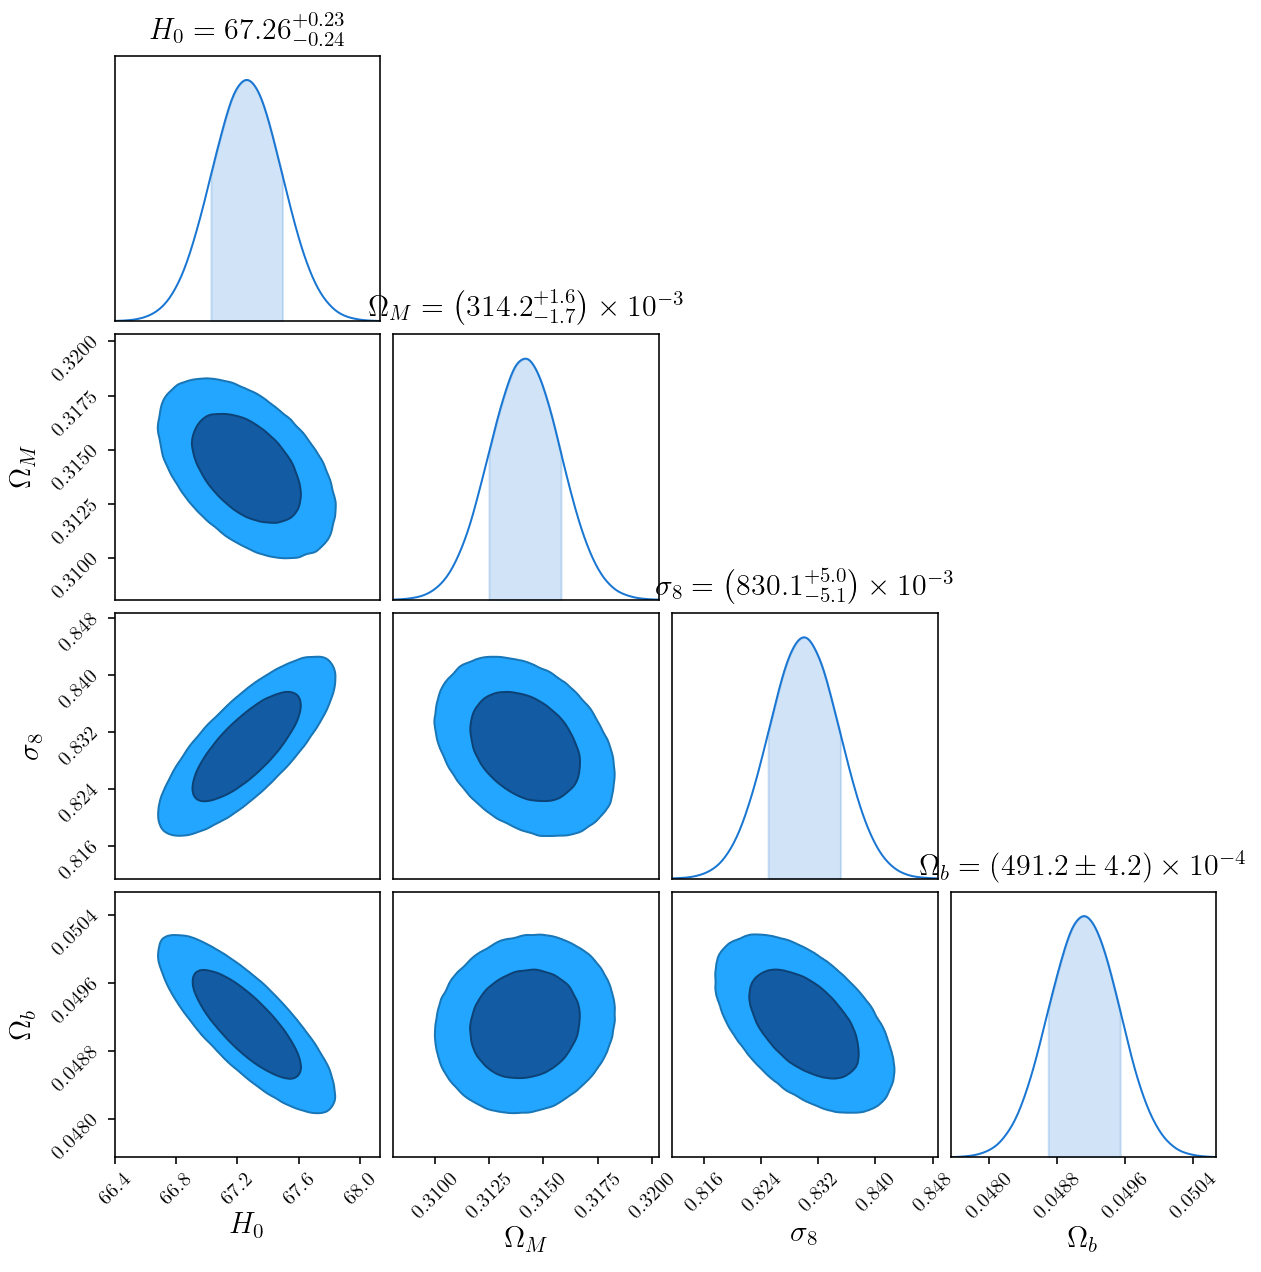

In [11]:
#Physical=False

simnumlist = [3,37,10,13,16,26]
plank = res_sims['planck']
fisher, paramlist, parameters = generate_fisher_matrix(sim_dic=plank, simnumlist=simnumlist, 
                                                       statlist=['vvf_p', 'vvf_rho', 'vvf_std',
                                                                'wp','xi0', 'xi2', 'xi4'], physical=False, r=2)

covmat = np.linalg.inv(fisher)

c = ChainConsumer()
c.add_covariance([plank[paramlist[0]], plank[paramlist[1]], plank[paramlist[2]], plank[paramlist[3]], 
                  plank[paramlist[4]], plank[paramlist[5]]], covmat, parameters=parameters)

c.configure(label_font_size=15)
fig = c.plotter.plot(parameters=['$H_0$', '$\Omega_M$', '$\sigma_8$', '$\Omega_b$'])

fig.set_size_inches(3 + fig.get_size_inches())

Shape of inverse covariance matrix = (26, 26)
Scales for wp = [ 2.7507   3.78899  5.2192   7.18925  9.90293 13.64092 18.78987 25.88236]
Scales for xi0 = [ 2.99916252  4.75335226  7.53355564 11.93988104 18.92343619 29.99162519]
Scales for xi2 = [ 2.99916252  4.75335226  7.53355564 11.93988104 18.92343619 29.99162519]
Scales for xi4 = [ 2.99916252  4.75335226  7.53355564 11.93988104 18.92343619 29.99162519]
Scales for wp = [ 2.7507   3.78899  5.2192   7.18925  9.90293 13.64092 18.78987 25.88236]
Scales for xi0 = [ 2.99916252  4.75335226  7.53355564 11.93988104 18.92343619 29.99162519]
Scales for xi2 = [ 2.99916252  4.75335226  7.53355564 11.93988104 18.92343619 29.99162519]
Scales for xi4 = [ 2.99916252  4.75335226  7.53355564 11.93988104 18.92343619 29.99162519]
Shape of derivative matrix = (26, 6)
Shape of fisher matrix = (6, 6)


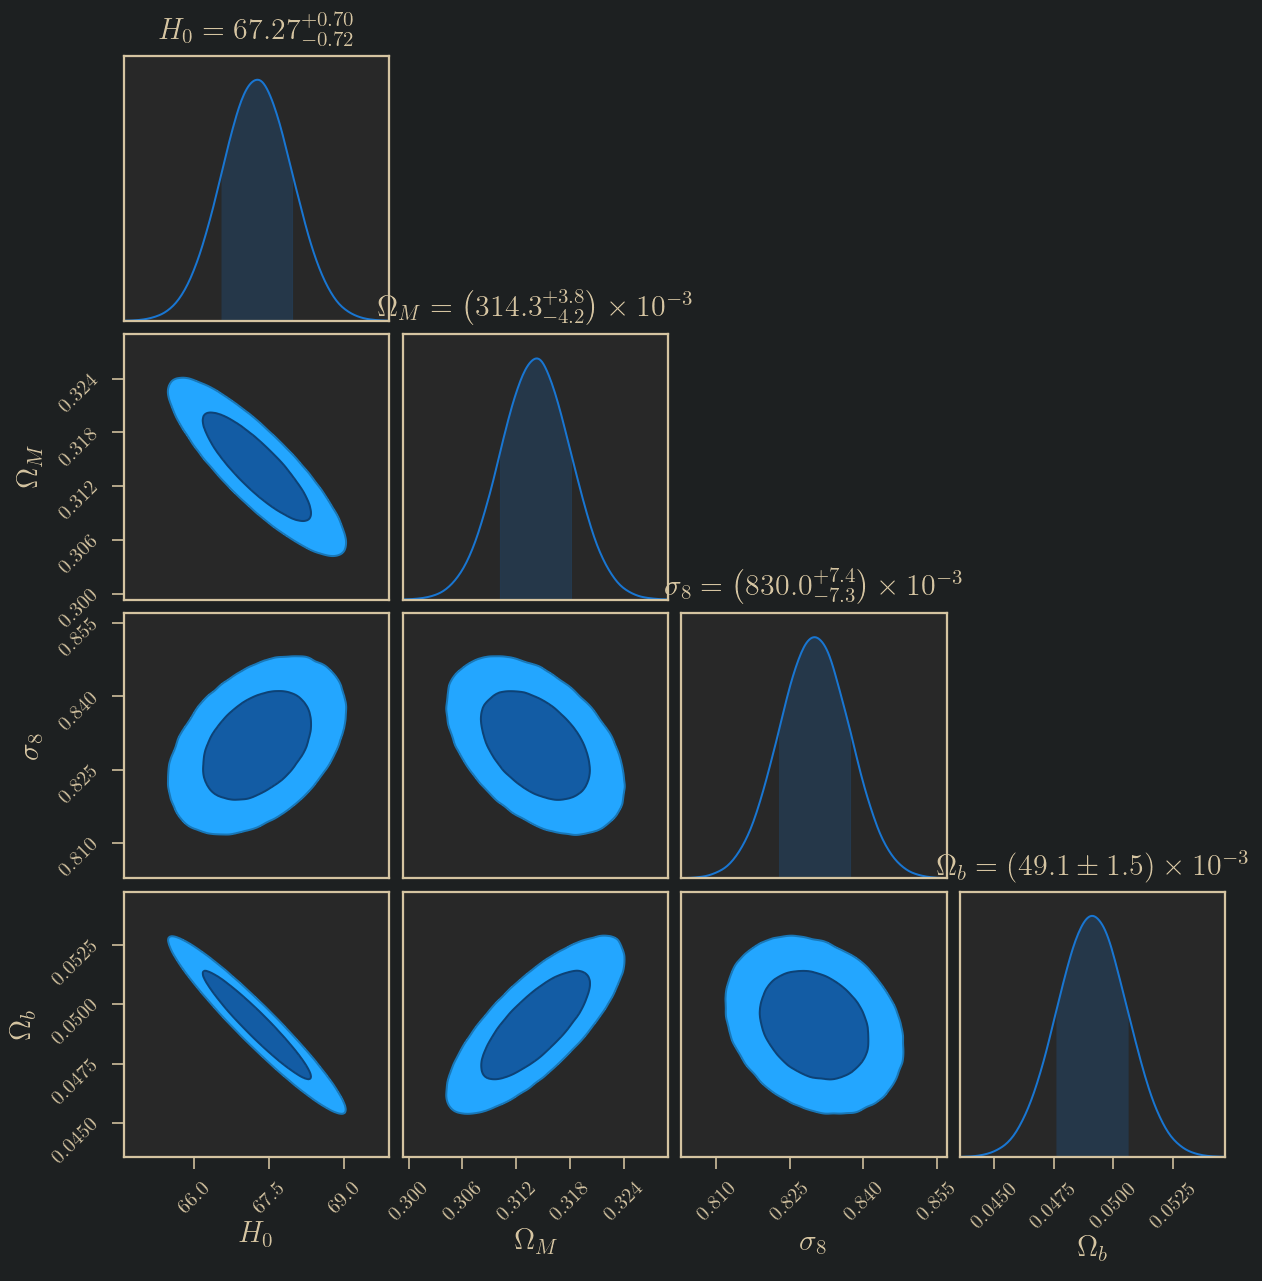

In [19]:
#Physical=False

simnumlist = [3,37,10,13,16,26]
plank = res_sims['planck']
fisher, paramlist, parameters = generate_fisher_matrix(sim_dic=plank, simnumlist=simnumlist, 
                                                       statlist=['wp','xi0', 'xi2', 'xi4'], physical=False, r=2)

covmat = np.linalg.inv(fisher)

c = ChainConsumer()
c.add_covariance([plank[paramlist[0]], plank[paramlist[1]], plank[paramlist[2]], plank[paramlist[3]], 
                  plank[paramlist[4]], plank[paramlist[5]]], covmat, parameters=parameters)

c.configure(label_font_size=15)
fig = c.plotter.plot(parameters=['$H_0$', '$\Omega_M$', '$\sigma_8$', '$\Omega_b$'])

fig.set_size_inches(3 + fig.get_size_inches())

Shape of inverse covariance matrix = (33, 33)
Scales for wp = [ 2.7507   3.78899  5.2192   7.18925  9.90293 13.64092 18.78987 25.88236]
Scales for xi0 = [ 2.99916252  4.75335226  7.53355564 11.93988104 18.92343619 29.99162519]
Scales for xi2 = [ 2.99916252  4.75335226  7.53355564 11.93988104 18.92343619 29.99162519]
Scales for xi4 = [ 2.99916252  4.75335226  7.53355564 11.93988104 18.92343619 29.99162519]
Scales for wp = [ 2.7507   3.78899  5.2192   7.18925  9.90293 13.64092 18.78987 25.88236]
Scales for xi0 = [ 2.99916252  4.75335226  7.53355564 11.93988104 18.92343619 29.99162519]
Scales for xi2 = [ 2.99916252  4.75335226  7.53355564 11.93988104 18.92343619 29.99162519]
Scales for xi4 = [ 2.99916252  4.75335226  7.53355564 11.93988104 18.92343619 29.99162519]
Shape of derivative matrix = (33, 6)
Shape of fisher matrix = (6, 6)
Shape of inverse covariance matrix = (26, 26)
Scales for wp = [ 2.7507   3.78899  5.2192   7.18925  9.90293 13.64092 18.78987 25.88236]
Scales for xi0 = [ 2.99

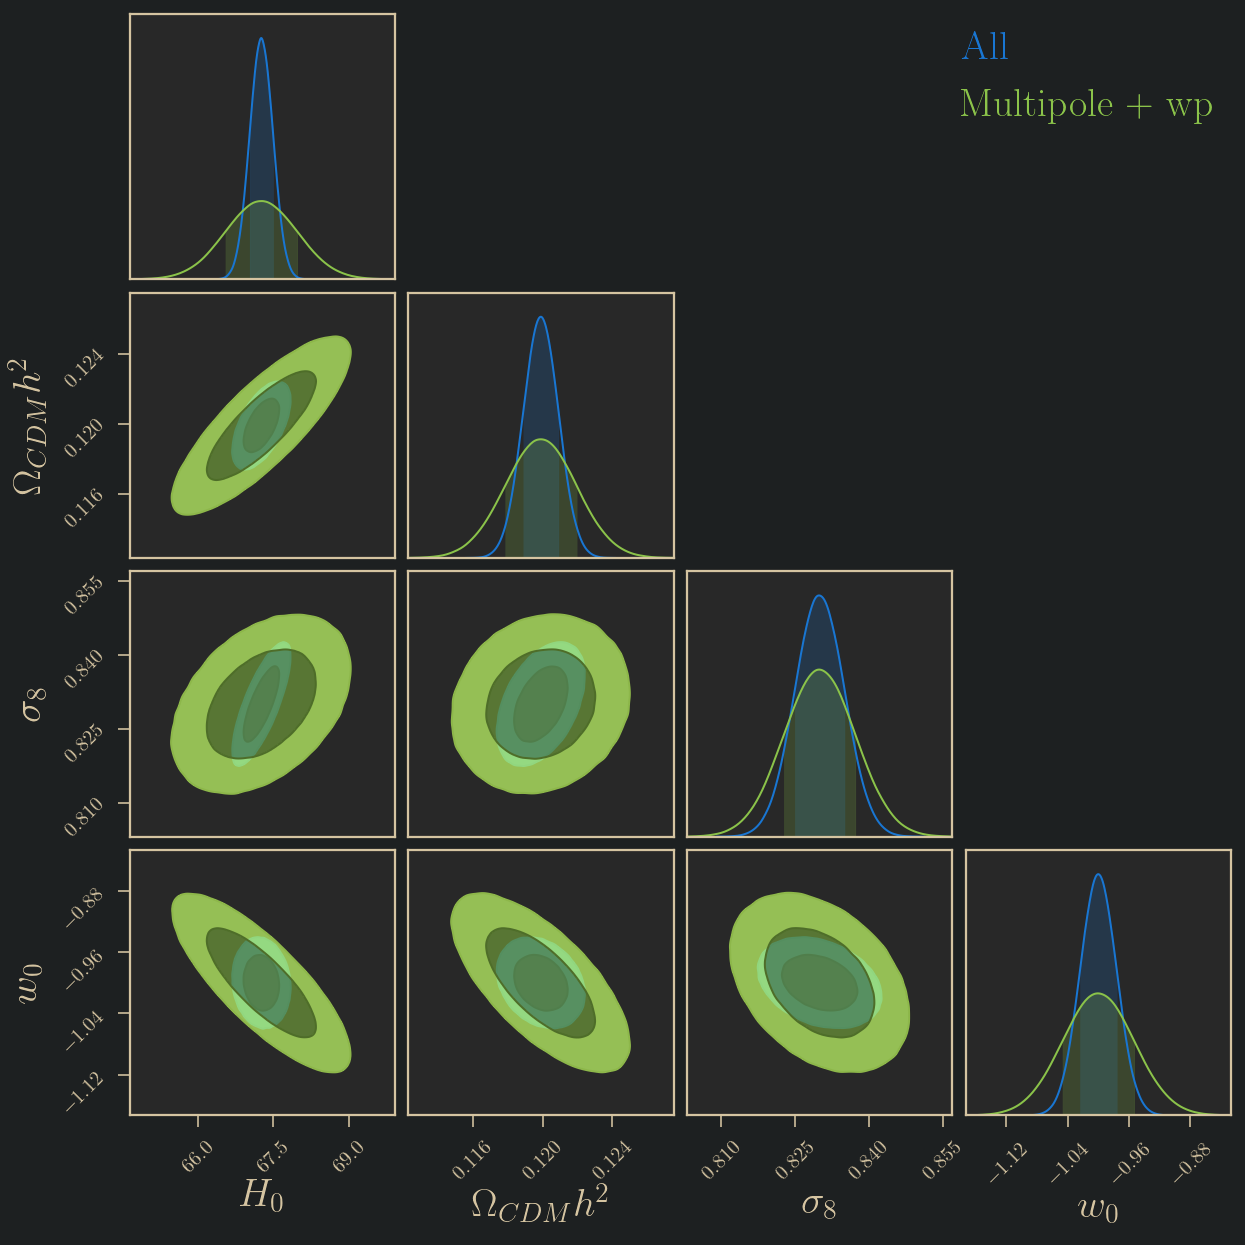

In [15]:
simnumlist = [3,37,10,13,16,26]
plank = res_sims['planck']
fisher, paramlist, parameters = generate_fisher_matrix(sim_dic=plank, simnumlist=simnumlist,
                                                       statlist=['vvf_std', 'vvf_p', 'vvf_rho', 
                                                                 'wp','xi0', 'xi2', 'xi4'], physical=True, r=2)
fisher2, paramlist2, parameters2 = generate_fisher_matrix(sim_dic=plank, simnumlist=simnumlist,
                                                          statlist=['wp','xi0', 'xi2', 'xi4'], physical=True, r=2)

covmat = np.linalg.inv(fisher)
covmat2 = np.linalg.inv(fisher2)

c = ChainConsumer()
c.add_covariance([plank[paramlist[0]], plank[paramlist[1]], plank[paramlist[2]], plank[paramlist[3]], 
                  plank[paramlist[4]], plank[paramlist[5]]], covmat, parameters=parameters, name='All')
c.add_covariance([plank[paramlist[0]], plank[paramlist[1]], plank[paramlist[2]], plank[paramlist[3]], 
                  plank[paramlist[4]], plank[paramlist[5]]], covmat2, parameters=parameters2, name="Multipole + wp")

c.configure(label_font_size=20)
fig = c.plotter.plot(parameters=['$H_0$', '$\Omega_{CDM}h^2$', '$\sigma_8$', '$w_0$'])

fig.set_size_inches(3 + fig.get_size_inches())  # Resize fig for doco. You don't need this.

# Error analysis

Text(0.5, 0.98, '$r > $5 Mpc/h')

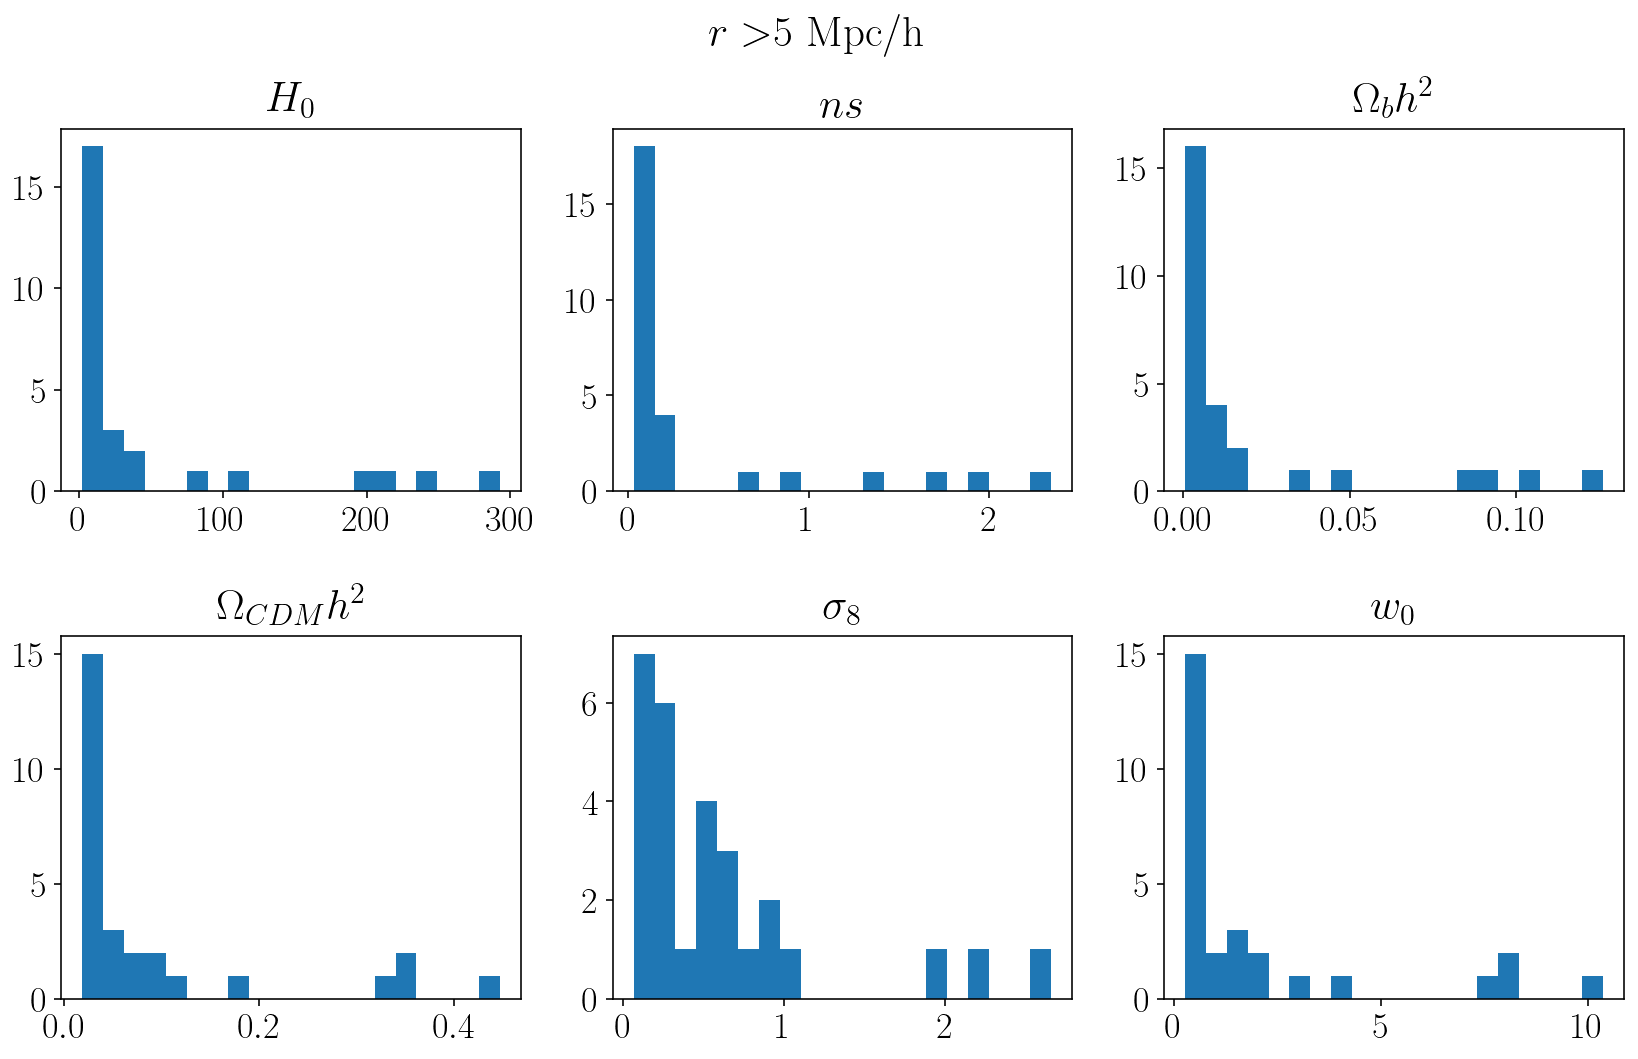

In [13]:
#Only 'wp' gives large errors for simulations [0,3,4,6,7,9]

simnum_list = [3,37,10,13,16,26,23,31]
plank = res_sims['planck']
statlist = ['wp']
all_comb = itertools.combinations(simnum_list,6)
r = 5

errors = {}
for i, comb in enumerate(all_comb):
    fisher, paramlist, parameters = generate_fisher_matrix(sim_dic=plank, simnumlist=comb,
                                                       statlist=statlist, physical=True, r=r, silent=True)

    covmat = np.linalg.inv(fisher)

    for j, param in enumerate(paramlist):
        errors.setdefault(param, []).append(np.sqrt(covmat[j][j]))

#Plot histograms
fig, ax = pl.subplots(2, 3, sharex=False, sharey=False, figsize=(14,8))
ax = ax.reshape(ax.size)
for i, param in enumerate(errors.keys()):
    ax[i].hist(errors[param], bins=20)
    ax[i].set_title(parameters[i])
    
pl.subplots_adjust(hspace=0.4)
fig.suptitle("$r > $" + str(r) + " Mpc/h")

In [14]:
for i, param in enumerate(errors.keys()):
    print("Mean error for {} = {}. st.dev. in error = {}".format(param, round(np.mean(errors[param]), 4), 
                                                                 round(np.std(errors[param]), 5)))
    print("Percent error in error = {}%".format(round(np.std(errors[param])*100.0/np.mean(errors[param])), 2))

Mean error for H0 = 49.149. st.dev. in error = 80.74316
Percent error in error = 164.0%
Mean error for ns = 0.3824. st.dev. in error = 0.64139
Percent error in error = 168.0%
Mean error for ombh2 = 0.0209. st.dev. in error = 0.03481
Percent error in error = 166.0%
Mean error for omch2 = 0.0946. st.dev. in error = 0.12095
Percent error in error = 128.0%
Mean error for sigma_8 = 0.6153. st.dev. in error = 0.64831
Percent error in error = 105.0%
Mean error for w0 = 2.0471. st.dev. in error = 2.83825
Percent error in error = 139.0%


In [15]:
print(np.where(np.array(errors['H0']) > 50))
print(np.where(np.array(errors['ns']) > 0.5))
print(np.where(np.array(errors['ombh2']) > 0.025))
print(np.where(np.array(errors['omch2']) > 0.12))
print(np.where(np.array(errors['sigma_8']) > 0.8))
print(np.where(np.array(errors['w0']) > 2.5))
all_comb = list(itertools.combinations(simnum_list,6))
for i,comb in enumerate(all_comb):
    comb = ('planck',) + comb
    all_comb[i] = list(comb)

(array([0, 3, 4, 6, 7, 9]),)
(array([0, 3, 4, 6, 7, 9]),)
(array([0, 3, 4, 6, 7, 9]),)
(array([0, 3, 4, 6, 7, 9]),)
(array([0, 3, 4, 6, 7, 9]),)
(array([0, 3, 4, 6, 7, 9]),)


In [16]:
full_table.loc[all_comb[3]]

H0        ns     ombh2     omch2   sigma_8        w0   Omega_M  \
planck  67.26000  0.965200  0.022220  0.119900  0.830000 -1.000000  0.314153   
3       66.21955  0.975418  0.022263  0.122157  0.858119 -0.982489  0.329348   
37      70.54661  0.973076  0.022565  0.113090  0.825002 -1.042555  0.272574   
10      67.03401  0.960994  0.021974  0.123182  0.830428 -0.995435  0.323031   
13      64.07216  0.976326  0.022200  0.113102  0.775957 -0.792247  0.329584   
26      69.32830  0.962947  0.021769  0.120078  0.830551 -1.062407  0.295120   
23      62.74818  0.964982  0.022202  0.117528  0.769882 -0.796463  0.354885   

             omb  
planck  0.049117  
3       0.050770  
37      0.045340  
10      0.048901  
13      0.054078  
26      0.045292  
23      0.056389

Text(0.5, 0.98, '$r > $5 Mpc/h')

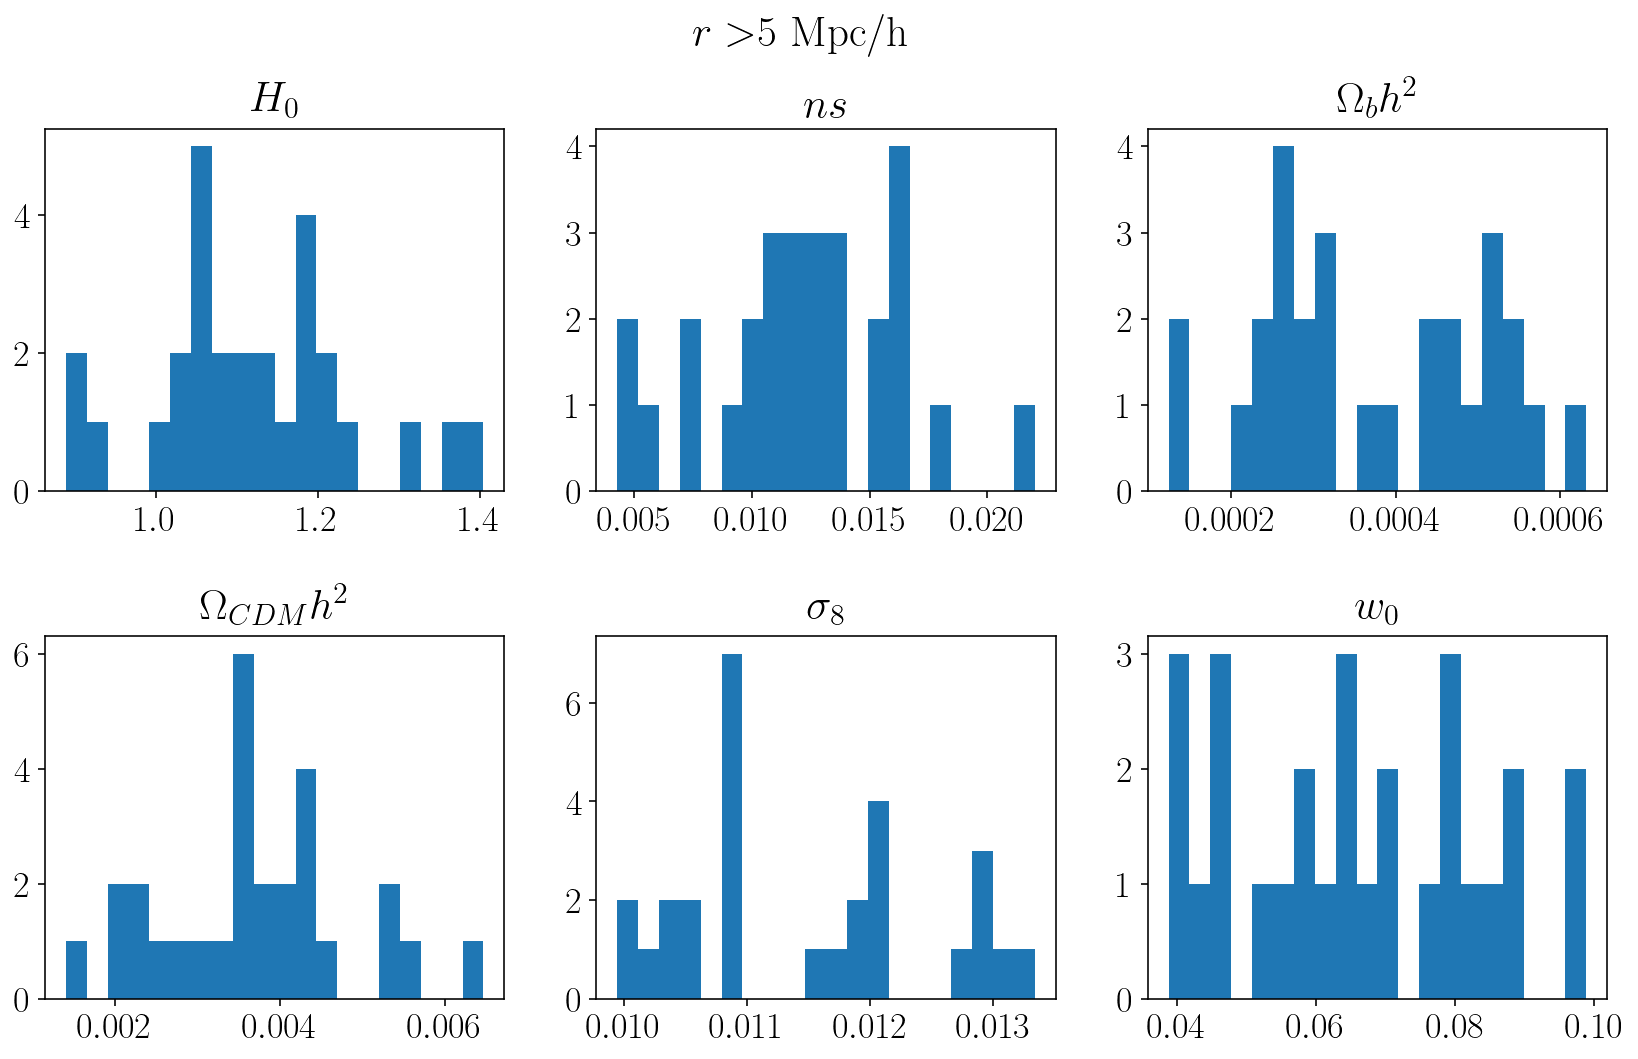

In [17]:
# The anomaly goes away when multipoles are added

simnum_list = [3,37,10,13,16,26,23,31]
plank = res_sims['planck']
statlist = ['wp', 'xi0', 'xi2', 'xi4']
all_comb = itertools.combinations(simnum_list,6)
r = 5

errors = {}
for i, comb in enumerate(all_comb):
    fisher, paramlist, parameters = generate_fisher_matrix(sim_dic=plank, simnumlist=comb,
                                                       statlist=statlist, physical=True, r=r, silent=True)

    covmat = np.linalg.inv(fisher)

    for j, param in enumerate(paramlist):
        errors.setdefault(param, []).append(np.sqrt(covmat[j][j]))

#Plot histograms
fig, ax = pl.subplots(2, 3, sharex=False, sharey=False, figsize=(14,8))
ax = ax.reshape(ax.size)
for i, param in enumerate(errors.keys()):
    ax[i].hist(errors[param], bins=20)
    ax[i].set_title(parameters[i])
    
pl.subplots_adjust(hspace=0.4)
fig.suptitle("$r > $" + str(r) + " Mpc/h")

In [18]:
for i, param in enumerate(errors.keys()):
    print("Mean error for {} = {}. st.dev. in error = {}".format(param, round(np.mean(errors[param]), 4), 
                                                                 round(np.std(errors[param]), 5)))
    print("Percent error in error = {}%".format(round(np.std(errors[param])*100.0/np.mean(errors[param])), 2))

Mean error for H0 = 1.1186. st.dev. in error = 0.12037
Percent error in error = 11.0%
Mean error for ns = 0.0123. st.dev. in error = 0.00403
Percent error in error = 33.0%
Mean error for ombh2 = 0.0004. st.dev. in error = 0.00013
Percent error in error = 36.0%
Mean error for omch2 = 0.0037. st.dev. in error = 0.00113
Percent error in error = 31.0%
Mean error for sigma_8 = 0.0115. st.dev. in error = 0.00101
Percent error in error = 9.0%
Mean error for w0 = 0.0657. st.dev. in error = 0.01733
Percent error in error = 26.0%
